Khai báo thư viện cần thiết

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Khai báo đường dẫn tệp dữ liệu

In [5]:
# set names to the paths because they're too long
data_path = 'D:/Code/python/mat3533/project/data/'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

Hàm lấy dữ liệu 

In [6]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

Lấy dữ liệu train và test từ tệp dữ liệu

In [7]:
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 60000)
test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 10000, _is=False)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


Kiểm tra một số hình ảnh của dữ liệu train

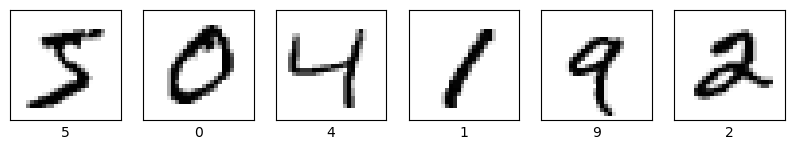

In [8]:
plt.figure(figsize=(10,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

Chuẩn hóa dữ liệu

In [11]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_images)
test_x = scaler.fit_transform(test_images)
print(train_x.shape)

(60000, 784)


Dùng PCA giảm số chiều dữ liệu xuống 2 chiều

In [14]:
pca = PCA(n_components=2)
train_pca_02 = pca.fit_transform(train_x)
principal_df = pd.DataFrame(data = train_pca_02
             , columns = ['pc01', 'pc02'])
principal_df.shape

(60000, 2)

Trực quan hóa dữ liệu ở dạng 2D

Text(0, 0.5, 'Principal Component 02')

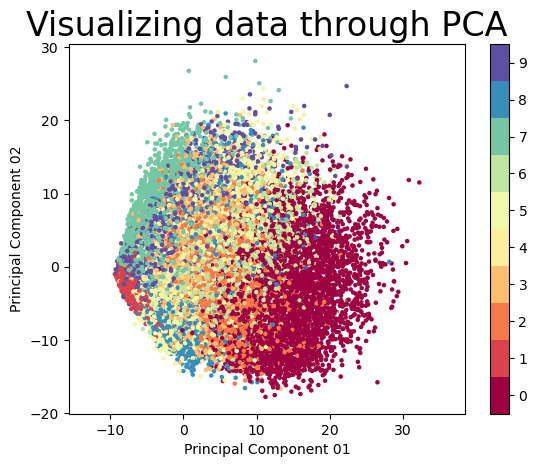

In [15]:
plt.scatter(train_pca_02[:, 0], train_pca_02[:, 1], s= 5, c=train_labels, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing data through PCA', fontsize=24)
plt.xlabel('Principal Component 01')
plt.ylabel('Principal Component 02')